
<span style="display: inline-block; margin-right: 20px; text-align: center; margin: 0 auto;">
  <img src="https://www.unitru.edu.pe/Recursos/img-unt/logo-unt1.png" alt="Descripción de la imagen 1" width="600" />
</span>

<span style="display: inline-block; text-align: center;">
  <img src="https://yt3.googleusercontent.com/ytc/AOPolaShdJp99F2glLd7P8f-9o-_ul7FmH0CwEllNqSy=s900-c-k-c0x00ffffff-no-rj" alt="Descripción de la imagen 2" width="300" />
</span>

**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

## `LABORATORIO 01 - FILTRO MEDIA MÓVIL Y GAUSSIANO`

### `INTEGRANTES:`
* **Piminchumo Leyva Giusseppe Amaru**
* **Polo Gonzalez Diego Jesus**
* **Salirrosas Castro Anghelo Joseph**




## **5.RESULTADOS DE LA EXPERIENCIA**
### 5.1. LIBRERIAS A INSTALAR

In [ ]:
!wget -nc https://vvestman.github.io/summerschool19/sounds/Im_Superman.wav
!wget -nc https://vvestman.github.io/summerschool19/sounds/Count_Of_Three-8khz.wav

!pip install pysoundfile
!pip install bitstring

File ‘Im_Superman.wav’ already there; not retrieving.

File ‘Count_Of_Three-8khz.wav’ already there; not retrieving.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 7.4 MB/s eta 0:00:00


In [14]:
from google.colab import files

load=files.upload()

Saving Seria batman.wav to Seria batman.wav


##**5.2. RESULTADO A**
**Instrucciones:**
* Elegir un audio wav y aplicar filtro media móvil de orden 101. Luego comparar la gráfica original y con filtro:

###5.2.1. Librerias a utilizar

In [22]:
import IPython

import soundfile
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

IPython.display.Audio('Seria batman.wav')

###5.2.2. Obteniendo la señal de audio

Tasa de muestreo: 48000 muestras/segundo
Tamaño de la señal: 236844 muestras
Duración: 4.934 segundos


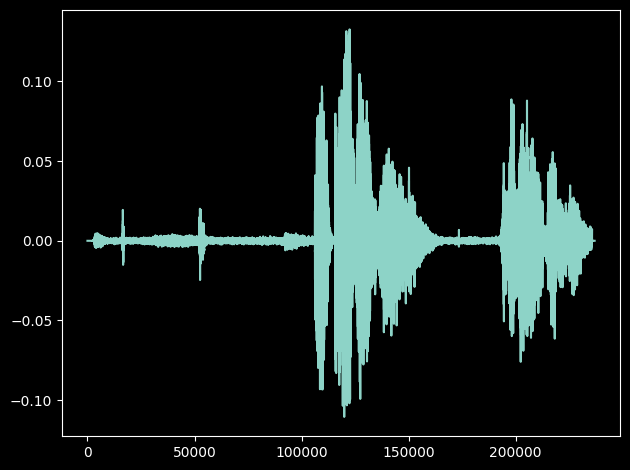

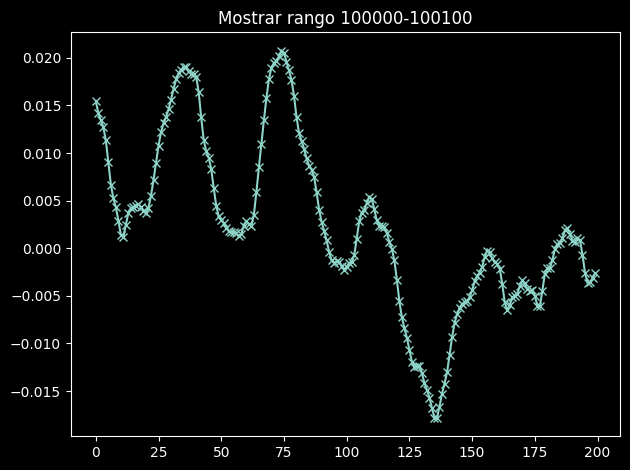

In [169]:
audio_signal, fm=soundfile.read('Seria batman.wav')

type(audio_signal)
print('Tasa de muestreo: {} muestras/segundo'.format(fm))
print('Tamaño de la señal: {} muestras'.format(audio_signal.shape[0]))
print('Duración: {:.3f} segundos'.format(audio_signal.shape[0] / fm))

plt.plot(audio_signal)
plt.tight_layout()
plt.figure()
plt.plot(audio_signal[106500:106700], marker='x')
plt.title('Mostrar rango 106500-106700')
plt.tight_layout()

###5.2.3. Pasando a formato numpy

129601


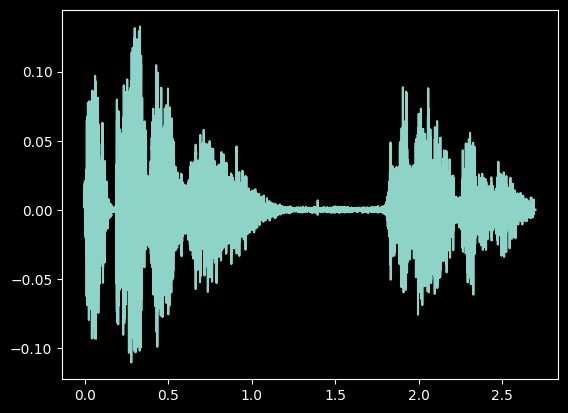

'\n#Ruido:\namplitud_ruido=0.05\nruido=amplitud_ruido * np.random.rand(dimension_t)\n#Señal con ruido:\nsenial_batruido=senial_batman+ruido\n\nplt.plot(t,senial_batruido)\nplt.show()\n'

In [170]:
t = np.arange(0,2.7,1/fm)

dimension_t = len(t)

print(dimension_t)
inicio=106500
senial_batman=np.array(audio_signal[inicio:inicio+dimension_t])

plt.plot(t,senial_batman)
plt.show()

'''
#Ruido:
amplitud_ruido=0.05
ruido=amplitud_ruido * np.random.rand(dimension_t)
#Señal con ruido:
senial_batruido=senial_batman+ruido

plt.plot(t,senial_batruido)
plt.show()
'''


###5.4. Elaboracion del Filtro Media Móvil

* **Filtro Media Móvil**

2.1041666666666665


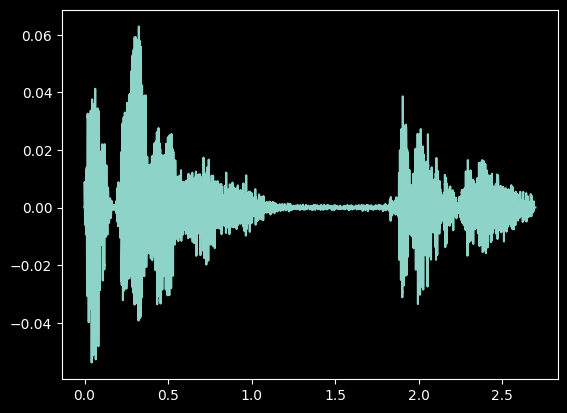

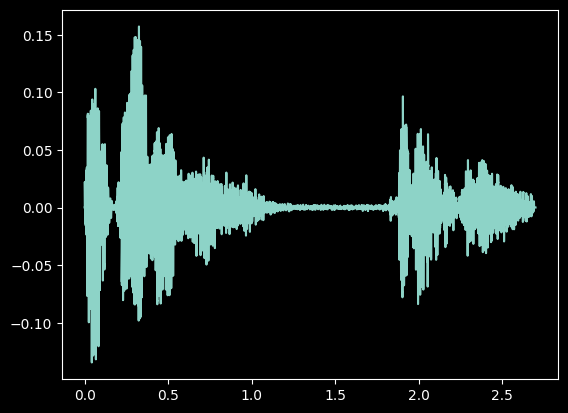

In [175]:
#Orden 101: n=2k+1
n=101
k=int((n-1)/2)
dimension_t=int(dimension_t)

senial_batifiltro=np.zeros_like(senial_batman)

for i in range(k,dimension_t-k+1):
    senial_batifiltro[i] = float(np.mean(senial_batman[i-k:i+k]))

#Para el tamaño ventana:
tamanio_ventana = 1000*((2*k+1)/fm) #tamaño del filtro en milisegundos, tiempo de retardo
print(tamanio_ventana)
plt.plot(t,senial_batifiltro)
plt.show()

senial_batifiltroAmplitud=np.zeros_like(senial_batman)

#Aumentando señal
for i in range(senial_batifiltro.size):
    senial_batifiltroAmplitud[i] = 2.5*senial_batifiltro[i]
plt.plot(t,senial_batifiltroAmplitud)
plt.show()


###5.2.5. Resultados con comparaciones

* **Gráficas de Resultados:**

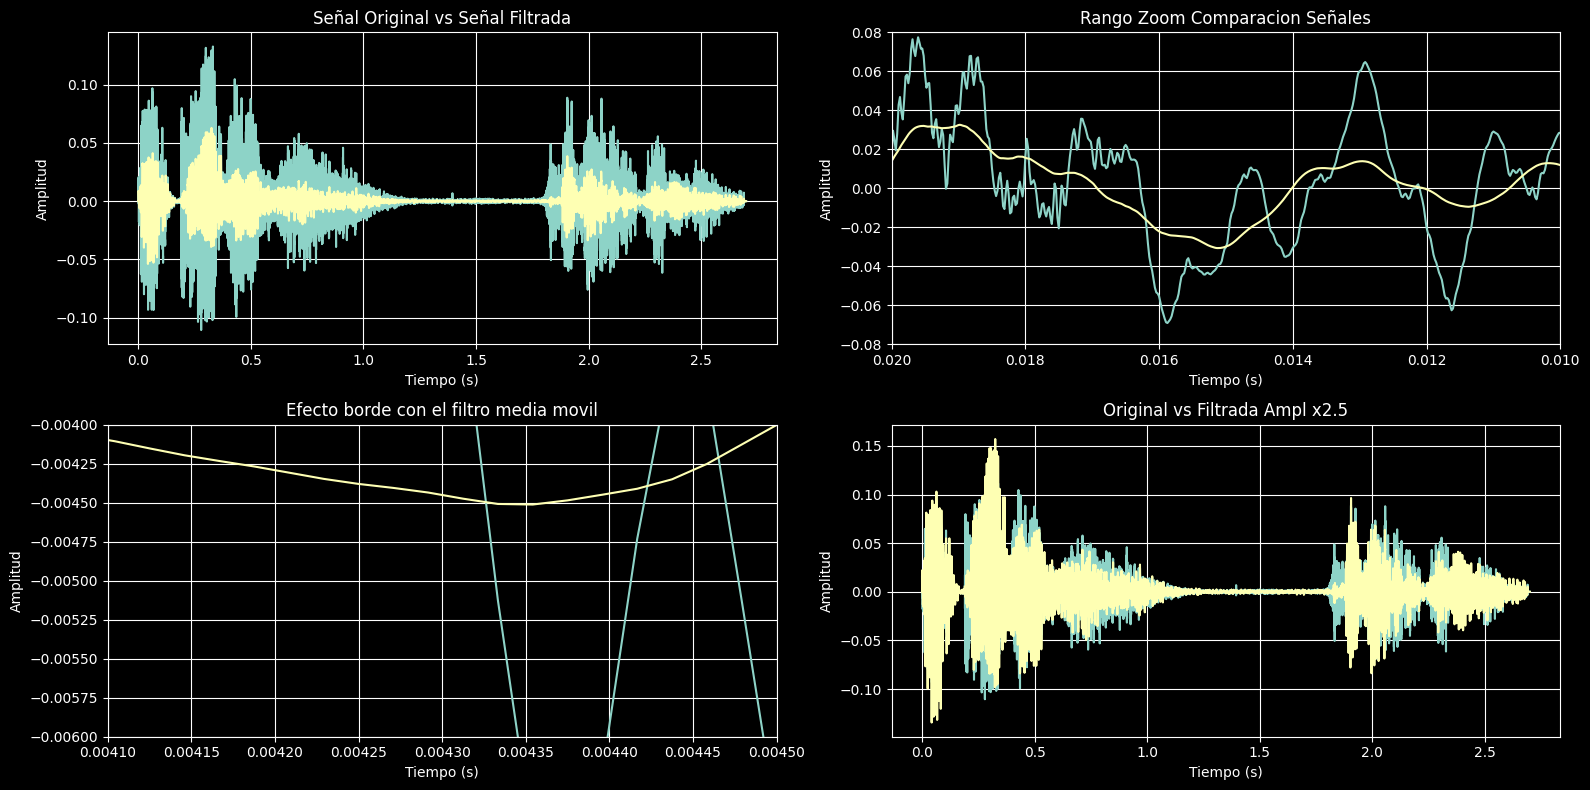

In [176]:
plt.subplots(2,2,figsize=(16,8))

plt.subplot(221)
plt.plot(t,senial_batman)
plt.plot(t,senial_batifiltro)
plt.grid(True)
plt.title('Señal Original vs Señal Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(222)
plt.plot(t,senial_batman)
plt.plot(t,senial_batifiltro)
plt.grid(True)
plt.title('Rango Zoom Comparacion Señales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.axis([0.02,0.010,-0.08,0.08])

plt.subplot(223)
plt.plot(t,senial_batman)
plt.plot(t,senial_batifiltro)
plt.grid(True)
plt.title('Efecto borde con el filtro media movil')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.axis([0.0041,0.0045,-0.006,-0.004])

plt.subplot(224)
plt.plot(t,senial_batman)
plt.plot(t,senial_batifiltroAmplitud)
plt.grid(True)
plt.title('Original vs Filtrada Ampl x2.5')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

###5.2.6. Resultados con Archivos de Audio Obtenidos

* **Guardar y exportar a formato wav, la señal con el audio filtrado para reproducirlas**

In [177]:
rutaGuardado='batiaudio.wav'
rutaGuardadoAmplitud='batiaudioAmplitud.wav'

soundfile.write(rutaGuardado, senial_batifiltro, fm)
soundfile.write(rutaGuardadoAmplitud, senial_batifiltroAmplitud, fm)

* **Descargar los archivos en formato wav creados con filtro, de forma local:**

In [156]:
files.download(rutaGuardado)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [157]:
files.download(rutaGuardadoAmplitud)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* **Reproducir y comparar señales**

In [179]:
print("Señal Original:")
IPython.display.Audio('Seria batman.wav')

Señal Original:


In [180]:
print("Señal Con Filtro Media Movil:")
IPython.display.Audio('batiaudio.wav')

Señal Con Filtro Media Movil:


In [181]:
print("Señal Filtrada Con Amplitud x2.5:")
IPython.display.Audio('batiaudioAmplitud.wav')

Señal Filtrada Con Amplitud x2.5:


###5.2.7. Respuesta a la Pregunta
* **¿Que efecto sonoro identifica entre el audio original y el modificado?**

El efecto sonoro identificado en el audio original en comparación con el audio modificado mediante un filtro de media móvil es principalmente una mejora en la calidad del audio y una suavización del sonido. Sin embargo, uno de los cambios notorios en el resultado es que el nivel de volumen disminuye.

El filtro de media móvil se utiliza permitió suavizar la señal de audio y reducir el ruido. Debido a su funcionamiento, promediando los valores de las muestras de audio en un intervalo de tiempo determinado, lo que pudo eliminar variaciones rápidas y abruptas en la señal. Esto puede llevar a una disminución en la intensidad de los picos sonoros y, por lo tanto, una reducción en el nivel de volumen percibido, originando un audio que suene más suave y menos áspero.



##**5.3. RESULTADO B**

###5.3.1. Obteniendo la señal de audio

Tasa de muestreo: 48000 muestras/segundo
Tamaño de la señal: 236844 muestras
Duración: 4.934250 segundos


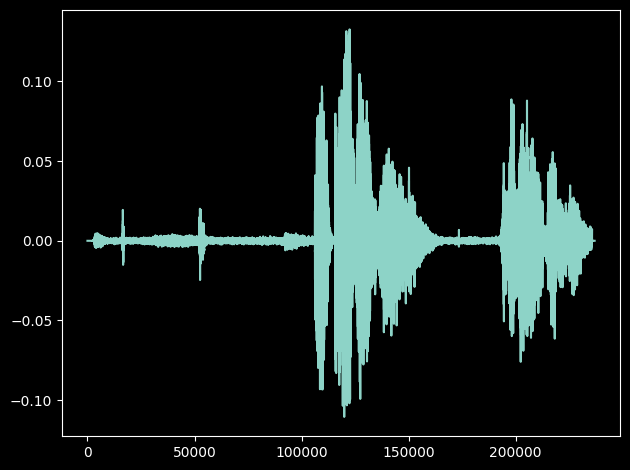

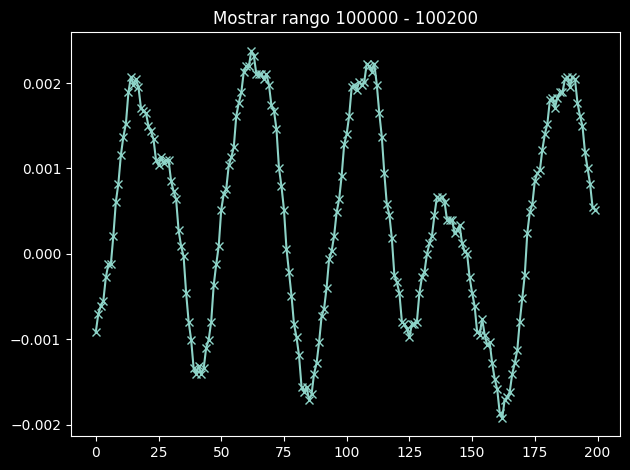

In [183]:
audio_signal, fm = soundfile.read("Seria batman.wav")
type(audio_signal)
audio_signal
print('Tasa de muestreo: {} muestras/segundo'.format(fm))
print('Tamaño de la señal: {} muestras'.format(audio_signal.shape[0]))
print('Duración: {:3f} segundos'.format(audio_signal.shape[0] / fm))
plt.plot(audio_signal)
plt.tight_layout()
plt.figure()
plt.plot(audio_signal[100000:100200], marker = 'x')
plt.title('Mostrar rango 100000 - 100200')
plt.tight_layout()

###5.3.2. Pasando a formato Numpy

In [184]:
t = np. arange(0,3,1/fm)
dimension_t=len(t)
print(dimension_t)

144000


###5.3.3. Elaboración del Filtro Gaussiano

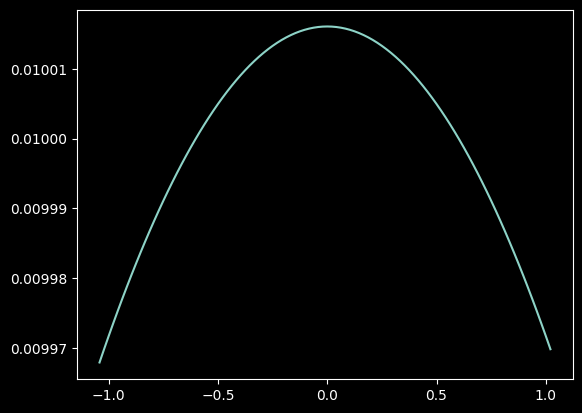

In [185]:
FWHM=25
k=50 #Orden del filtro

gauss_t = 1000*np.arange(-k,k)/fm

filtro_gaussiano = np.exp(-4*(np.log(2)*gauss_t**2)/FWHM**2)

#Como es un filtro, se necesita normalizarlo:
filtro_gaussiano_normalizado = filtro_gaussiano / np.sum(filtro_gaussiano)

plt.plot(gauss_t, filtro_gaussiano_normalizado)
plt.show()

###5.3.4. Aplicación del filtro

```
# Esto tiene formato de código
```



In [186]:
inicio=90000
sen_ruidosa=np.array(audio_signal[inicio:inicio+dimension_t])

sen_filtrada_gauss= np.zeros_like(sen_ruidosa)
print(len(sen_filtrada_gauss))
for i in range(k+1,dimension_t-k-1):
  sen_filtrada_gauss[i]=np.sum(sen_ruidosa[i-k:i+k]*filtro_gaussiano_normalizado)

144000


###5.3.5. Obtención de Gráficas

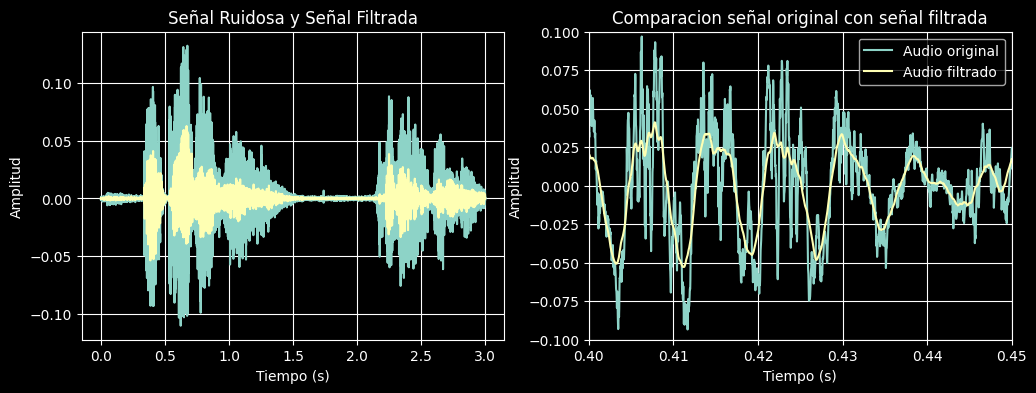

In [187]:
plt.subplots(1,2,figsize=(12,4))

plt.subplot(121)
plt.plot(t,sen_ruidosa)
plt.plot(t,sen_filtrada_gauss)
plt.grid(True)
plt.title('Señal Ruidosa y Señal Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(122)
plt.plot(t,sen_ruidosa, label='Audio original')
plt.plot(t,sen_filtrada_gauss, label="Audio filtrado")
plt.grid(True)
plt.title('Comparacion señal original con señal filtrada')
plt.axis([0.4,0.45,-0.1,0.1])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

###5.3.6. Resultados con Archivos de Audio

In [188]:
rutaGuardadoGauss='batiaudioGaussiano.wav'

soundfile.write(rutaGuardadoGauss, sen_filtrada_gauss, fm)

print("Señal Original:")
IPython.display.Audio('Seria batman.wav')

Señal Original:


In [189]:
print("Señal Con Filtro Gaussiano:")
IPython.display.Audio('batiaudioGaussiano.wav')

Señal Con Filtro Gaussiano:


#**6. TEST DE COMPROBACION**

##6.a. Pregunta 1
- **a. ¿Cuál es la diferencia entre una señal estocástica de una señal determinística? Explique.**

    Una señal estocástica, también conocida como proceso estocástico o proceso aleatorio, es un tipo de señal en la que su comportamiento en el tiempo no puede predecirse. En lugar de tener un patrón o una relación causa-efecto clara, las señales estocásticas exhiben un componente aleatorio o de incertidumbre.

    Una señal determinística es un tipo de señal cuyo comportamiento en el tiempo puede describirse de manera precisa y predecible a través de una relación matemática o una fórmula específica. En otras palabras, no hay incertidumbre ni variabilidad aleatoria en una señal determinística; su valor en cualquier punto futuro se puede calcular con certeza a partir de su definición y condiciones iniciales.

    La principal diferencia de estas 2 es que las señales determinísticas no presentan variabilidad aleatoria ni incertidumbre inherente. Caso contrario a las señales estocásticas.

##6.b. Pregunta 2
- **b.	¿Qué es la tasa de muestreo de la señal? Explique.**

    Se refiere a la cantidad de mediciones o muestras tomadas por unidad de tiempo de una señal continua para convertirla en una representación digital discreta, durante el proceso necesario para convertirla de analógica en digital. Esta tasa se expresa en hercios (Hz) y determina la resolución temporal de la señal digitalizada.

    Para entender mejor este concepto supongamos que se tiene una señal de audio analógica, como una grabación de música. La tasa de muestreo de esta señal es la cantidad de veces por segundo que se toman medidas de la amplitud de la señal para convertirla en datos digitales. Por ejemplo, en un CD de audio estándar, la tasa de muestreo es de 44,1 kHz, lo que significa que se toman 44,100 muestras de amplitud por segundo para representar la señal analógica.

    Una tasa de muestreo más alta proporciona una representación más detallada de la señal, ya que se capturan más puntos en el tiempo. Sin embargo, también requiere más espacio de almacenamiento y capacidad de procesamiento.



##6.c. Pregunta 3
- **c.	¿El filtro media móvil implementado es causal? Explique.**

    Un filtro se considera causal cuando la salida en un momento dado depende únicamente de las entradas actuales y pasadas, y no de entradas futuras. En otras palabras, la respuesta del filtro en un instante de tiempo particular no se ve afectada por valores de entrada que aún no han ocurrido en ese momento.

    Un filtro de media móvil es un tipo de filtro utilizado en el procesamiento de señales y el análisis de datos para suavizar una señal o reducir el ruido al promediar un conjunto de valores de la señal en un intervalo de tiempo específico. El propósito principal de este filtro es eliminar las fluctuaciones rápidas y el ruido aleatorio en una señal para resaltar las tendencias o patrones a más largo plazo.

    Basándonos en estos 2 conceptos el filtro de media móvil implementado es causal. Ya que, en el caso del filtro de media móvil, se calcula la media de un conjunto de valores de entrada a lo largo del tiempo, y la salida en un instante de tiempo depende únicamente de las muestras pasadas y presentes en la señal de entrada.

#**7.BIBLIOGRAFÍA**

- Vicuña Muñoz, C. (1986). Aplicaciones de la teoría del muestreo. Proyecciones.
Journal of Mathematics, 5(12), 119–122.
https://doi.org/10.22199/s07160917.1986.0012.00013

- Introducción a las series de tiempo. Métodos paramétricos. Universidad De
Medellin. 1 de enero de 2007. Consultado el 6 de febrero de 2017.
https://books.google.es/books?id=KvLhxFPwvsUC&pg=PA13&dq=un+proceso+estoc%C3%A1stico+es&hl=es&sa=X&redir_esc=y#v=onepage&q=un%20proceso%20estoc%C3%A1stico%20es&f=false

- Iosif Ilyich Gikhman; Anatoly Vladimirovich Skorokhod (1969). Introducción a la
teoría de los procesos aleatorios. Courier Corporation

- Oppenheim, A. V., Willsky, A. S., & Young, I. T. (1983). Signals and systems. Englewood Cliffs, N.J: Prentice-Hall.

- Kamen, Edward W., y Bonnie S. Heck. (2008). Fundamentos de señales y sistemas usando la Web y MATLAB® PEARSON EDUCACIÓN, México, ISBN: 978-970-26-1187-5
